# This is a snapshot. Do not change!

This is a shortened version of the [`LevyFlight10.ipynb`](LevyFlight10.ipynb) notebook.

Only the section with simulation results is extended.

We show here some example trajectories.

# Test 2D Levy flight in a switching fitness landscape
<!-- ## The flights in each dimension are dependent -->

Potential interpolated from grid data, `./input/landscape1.csv` and `./input/landscape2.csv`
Grid data for potential taken from `/home/ochab/Dropbox/backup/ecoli/maple/fitness_new03a.mw`

# Uwaga!
Wykomentowane

<!-- Levy Flight jako proces symulujący spacer po krajobrazie dostosowania jest trudny matematycznie, bo:

1. Powoduje problemy numeryczne na brzegach: Gdy x lub y jest blisko 0, to przy używanym tutaj potencjale (-funkcja fitness) włącza się adaptacyjny bardzo mały krok czasowy i symulacja się zawiesza. Można ustalić sztuczne ograniczenie na krok czasowy, ale to oznacza, że numerycznie symulacja już nie produkuje ścisłego matematycznie lotu Levy'ego.

Inne problemy:

2. Potrzeba zdefiniować warunki brzegowe w x,y=0. 
    1. Wcześniej zdefiniowałam pozostawanie w poprzednim punkcie. 
    2. Teraz zdefiniowałam losowanie do skutku. 
    Jest to tak czy inaczej arbitralne.
3. Potrzeba zdefiniować warunki brzegowe w sytuacji, gdy fitness < 0
4. Nawet przy takich sztucznych ustawieniach, histogramy z wielu symulacji pokazują, że trajektorie pałętają się głównie przy brzegach x=0, y=0. Dlaczego? Przecież fitness ma globalne maksimum gdzie indziej. 
    1. Wygląda na to, że zależy to od warunków początkowych.
    2. Reprezentatywne próbkowanie całej przestrzeni jest niemożliwe, zajmie za dużo czasu obliczeniowego.
5. Trzeba by odrzucać możliwość ewolucji w dół fitness.
6. Zrobić nową gałąź do tej symulacji. -->

## Definitions

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

from run import run

In [3]:
def generate_ax_traj(ax:plt.axes, trajdf:pd.DataFrame) -> None:    
    """Generate plt.axes object that plots a trajectory saved in trajdf.

    Args:
        ax (plt.axes): Plot content
        trajdf (pd.DataFrame): Trajectory data frame with columns: 'x' and 'y'
    """    
    if trajdf is not None:
            ax.plot(trajdf.x,trajdf.y, color='black')
    return


def generate_ax_pcolormesh(
        fig:plt.figure, 
        ax:plt.axes, 
        axtitle:str, 
        df:pd.DataFrame, 
        z_column:str, 
        fmin:float, 
        fmax:float
        )-> None:
    """Generate plt.axes object that plots a colormesh.

    Args:
        fig (plt.figure): Figure (needed for colorbar() (???))
        ax (plt.axes): Plot content
        axtitle (str): Plot title
        df (pd.DataFrame): Dataframe with columns: x='kmr', y='kr', z=z_column
        z_column (str): z column title
        fmin (float): Minimal z value of the color mesh
        fmax (float): Maximal z value of the color mesh
    """        
    nx = int( df['kmr'].max() - df['kmr'].min() + 1)
    ny = int( df['kr'].max() - df['kr'].min() + 1)

    x = df['kmr'].values.reshape(nx,ny).T
    y = df['kr'].values.reshape(nx,ny).T
    z = df[z_column].values.reshape(nx,ny).T

    c = ax.pcolormesh(x,y,z,vmin=fmin, vmax=fmax, cmap = plt.cm.jet)

    ax.set_title(axtitle)
    ax.set_xlabel('kmr')
    ax.set_ylabel('kr')
    fig.colorbar(c , ax=ax) 
    return

def plot_figures(
        dflist:list, 
        z_column:str, 
        fmin:list=[], 
        fmax:list=[],
        trajdf:pd.DataFrame=None
        )-> None:
    """Plot any number of figures side by side.

    Args:
        dflist (list): List of dataframes containing the color mesh data
        z_column (str): z column title for the dataframes containing the color mesh data
        fmin (list, optional): Minimal z value of the color mesh. Defaults to [].
        fmax (list, optional): Maximal z value of the color mesh. Defaults to [].
        trajdf (pd.DataFrame, optional): Trajectory data frame with columns: 'x' and 'y'. Defaults to None.
    """    
    fig, ax = plt.subplots(1,len(dflist),  figsize=(4.5*len(dflist), 3))

    for i in range (len(dflist)):
        if len(dflist)==1:
            Ax=ax
            title = z_column
        else:  
            Ax = ax[i]
            title = z_column+str(i)

        if len(fmin)>0:
            v_min=fmin[i]
        else:
            v_min=None
        if len(fmax)>0:
            v_max=fmax[i]
        else:
            v_max=None    

        generate_ax_traj(ax=Ax, trajdf=trajdf)
    
        generate_ax_pcolormesh(
            fig=fig, 
            ax=Ax, 
            axtitle=title, 
            df=dflist[i], 
            z_column=z_column, 
            fmin=v_min, 
            fmax=v_max
            )

    plt.show()
    return

In [4]:
input_dir="./input/"
input_data_file1 = "landscape1.csv"
input_data_file2 = "landscape2.csv"
input_data_files=[input_data_file1,input_data_file2]
potentialfile1 = input_dir+input_data_file1
potentialfile2 = input_dir+input_data_file2
output_dir="./output/"
output_log_file="out.log"

In [5]:
Ndatafiles=2
dfv=[]
for i in range (Ndatafiles):
    dfv.append(pd.read_csv(input_dir+input_data_files[i]))

In [6]:
display(dfv[0])
display(dfv[1])

kmr     kr  fitness
0       1.0    1.0   -574.1
1       1.0    2.0   -573.2
2       1.0    3.0   -572.3
3       1.0    4.0   -571.4
4       1.0    5.0   -570.5
...     ...    ...      ...
9995  100.0   96.0   6202.0
9996  100.0   97.0   6292.0
9997  100.0   98.0   6382.0
9998  100.0   99.0   6472.0
9999  100.0  100.0   6562.0

[10000 rows x 3 columns]

kmr     kr  fitness
0       1.0    1.0 -23575.0
1       1.0    2.0 -23575.0
2       1.0    3.0 -23575.0
3       1.0    4.0 -23575.0
4       1.0    5.0 -23575.0
...     ...    ...      ...
9995  100.0   96.0 -22822.0
9996  100.0   97.0 -22812.0
9997  100.0   98.0 -22802.0
9998  100.0   99.0 -22792.0
9999  100.0  100.0 -22782.0

[10000 rows x 3 columns]

Until now, we have had the potential landscape (optimum=minimum): `dfv`

For plotting, we prefer the data as a fitness landscape (optimum=maximum): `dff`

## Convert potential landscape to fitness landscape

These are potential landscapes. Max fitness = min potential.

In [7]:
# Real copy
dff=[df.copy(deep=True) for df in dfv]
for df in dff:
    df['fitness']=-df['fitness']

## Run simulation

In [8]:
T1=1000.0
Ntraj1=1
dt1= 0.1 #0.001
minDt = 0. #1e-1
eta=0.1
D = 2. #1. #0.1
gamma = 1. #0.5
alpha=1.5
x0=5.
y0=5.
kr1=10.
kr2=20.
kmr1=90.
kmr2=100.

output_data_file=f"outT{T1:.0e}N{Ntraj1:.0e}dt{dt1:.0e}_single_traj.csv"

run(
    output_dir,
    output_data_file,
    output_log_file,
    alpha=alpha, 
    D=D,
    gamma = gamma,
    dt=dt1, 
    minDt=minDt,
    eta=eta,
    T=T1, 
    t0=0., 
    x0=x0,
    y0=y0,
    kmr1=kmr1,
    kmr2=kmr2,
    kr1=kr1,
    kr2=kr2,
    Ntraj=Ntraj1,
    seed = 785130160,
    potentialfile=potentialfile1,
    potentialfile_second=potentialfile2
    )



print(open('./output/out.log', 'r').read()) 

alpha = 1.5
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 1000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 785130160
Ntraj = 1
Whole single trajectory will be printed as the output.
Running the simulation...

-------------launch_2D_1traj_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Simulation stopped at:
X: 90
Y: 16
Z: -693.33
Output written to STDOUT.
Done.




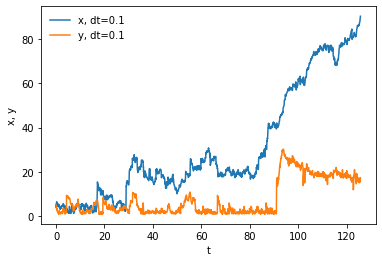

In [9]:
df=pd.read_csv(output_dir+output_data_file)

fig, ax = plt.subplots(1,1)
ax.plot(df.t, df.x , label=f"x, dt={dt1}")
ax.plot(df.t, df.y , label=f"y, dt={dt1}")
ax.legend(loc='best', frameon=False)
ax.set_xlabel("t")
ax.set_ylabel("x, y")
f=[dff[i]['fitness'].iloc[0] -(dff[i]['fitness'].max()-dff[i]['fitness'].min())/15 \
   for i in range(Ndatafiles)]

fmin=np.array(f)

fmax=fmin+700
plt.show()

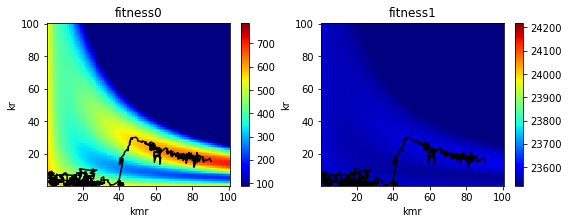

In [10]:

f=[dff[i]['fitness'].iloc[0] -(dff[i]['fitness'].max()-dff[i]['fitness'].min())/15 \
   for i in range(Ndatafiles)]

fmin=np.array(f)

fmax=fmin+700

plot_figures(dflist=dff, z_column='fitness',fmin=fmin, fmax=fmax, trajdf=df)

## Generate an ensemble of trajectories, plot heatmap of points reached at a given time

In [11]:
T1=50.
Ntraj1=1000 # Takes some time!

output_data_file=f"outT{T1:.0e}N{Ntraj1:.0e}dt{dt1:.0e}_ensemble.csv"

run(
    output_dir,
    output_data_file,
    output_log_file,
    alpha=alpha, 
    D=D,
    gamma = gamma,
    dt=dt1, 
    minDt=minDt,
    eta=eta,
    T=T1, 
    t0=0., 
    x0=x0,
    y0=y0,
    kmr1=kmr1,
    kmr2=kmr2,
    kr1=kr1,
    kr2=kr2,
    Ntraj=Ntraj1,
    seed = 785130169, # ?? Does it work here?
    potentialfile=potentialfile1,
    potentialfile_second=potentialfile2
)

print(open('./output/out.log', 'r').read()) 

alpha = 1.5
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 50
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 785130169
Ntraj = 1000
Only end points of the 1000 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Average time of simulation: 49.0342
Time simulation variance: 19.9264
Output written to STDOUT.
Done.




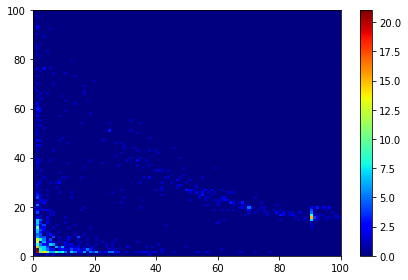

In [12]:
df1=pd.read_csv(output_dir+output_data_file)


fig, ax = plt.subplots(1,1)
Nbins = 100
x_bins = np.linspace(0, 100, Nbins)
y_bins = np.linspace(0, 100, Nbins)
h = ax.hist2d(np.array(df1.x), np.array(df1.y), bins =[x_bins, y_bins], cmap = plt.cm.jet) 
# nipy_spectral
fig.colorbar(h[3] , ax=ax) 
plt.tight_layout() 
plt.show()

Tajectories are supposed to stop at the square ((10,20),(90,100)).